In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import pickle

from uav_env import *

### **state Space**
$(x, y, p_x, p_y, angle, L, mass, intertia)$ : most simplified

### **observation**
(FOV array)

### **Action space**
(Propulsion (acc in facing angle), angular velocity)
```python
thrust, angular_momentum = action
thrust = np.clip(thrust, 0., 1.)
angular_momentum = np.clip(angular_momentum, -1., 1.) * UAV_ANG_POW
thrust_force = thrust_direction * thrust * UAV_THRUST_POW
```
Note the input of thrust and angular momentum needs to be interpretated as 0-100%, -100%-100%

### **Rewards**
*   increase/decrease the closer/durther the agent is to the goal.
*   increase/decrease the larger/smaller the magnitute of velocity $||v||$.
*   increase/decrease the larger/smaller the $\%$ of obstacle in FOV.

The episode receive an additional reward of -100 for crashing.

An episode is considered a solution if it reaches score.

### **Starting State**
The agent starts at the left ceter of the viewpoirt, with a initial $v_x$

### **Episode Termination**
If:
* The agent crashes
* The agent gets outside of the viewport

raw_reward:  [ 0.00460531  0.          0.95093443  0.00387379 -0.002     ] 
reward:  0.043919014164519765
[ 1.62732387  1.71106976  2.01148271  2.7685691   5.2661313  10.
 10.          6.39151812 10.         10.          7.39112294 10.
 10.          2.70284006  2.51883217  3.32961464  5.2661304   2.7685691
  2.01148327  1.71106976]
state:  [ 0.          0.          0.          0.00460531 -0.15414404  0.83726761
  0.82889302  0.79885173  0.72314309  0.47338687  0.          0.
  0.36084819  0.          0.          0.26088771  0.          0.
  0.72971599  0.74811678  0.66703854  0.47338696  0.72314309  0.79885167
  0.82889302]
0.0 27.195120087764966 -0.15414404455598918


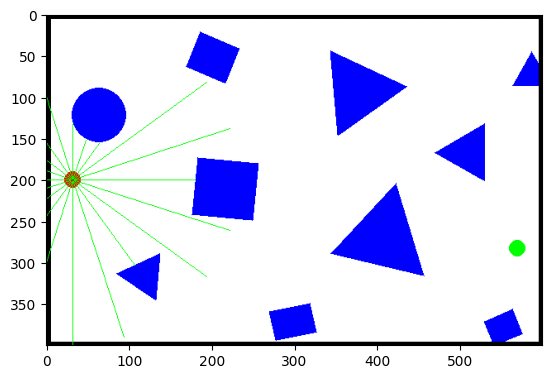

In [2]:
env = SimpleUAVEnv()
env.reset()
total_steps = 1  # Total number of steps in the test
thrust_increment = 1  # Increment in thrust per step
angular_momentum = 0  # Constant angular momentum (for simplicity)

# Run the test
for step in range(total_steps):
    # Gradually increase thrust
    thrust = thrust_increment 

    # Create the action (thrust, angular momentum)
    action = 1

    # Perform a step in the environment
    state, reward, done, raw_reward = env.step(action)

    # Render the current state
    frame = env.render()

    # Break the loop if the episode is done
    if done:
        break

    # Pause for a short time to see the animation
    time.sleep(0.1)

# Close the environment
env.close()
print('raw_reward: ', raw_reward, '\nreward: ', reward)
print(env._get_obs())
print('state: ', state)
print(env.uav.angle,env.dist2goal, env.ang2goal)
plt.imshow(frame)
plt.savefig('test.png', dpi=600)

#raw_reward = np.array((distance_reward/REW_DIST2GOAL,  velocity_reward/REW_VEL, angle_reward/REW_ANGLE, fov_reward, act_reward))

In [3]:
fov_reward = 0
print('OBS Offset: ', OBS_OFFSET, 'UAV Radius: ', UAV_RADIUS)
for distance in env._get_obs():
    print('distance: ', distance, ' PEN: ', env._leakyrelu_penalty(distance, offset=OBS_OFFSET, max_penalty=PEN_COLLISION)*PEN_OBSTACLE)

OBS Offset:  1.5 UAV Radius:  0.5
distance:  1.6273238658907825  PEN:  0.00012732386589078248
distance:  1.7110697642702097  PEN:  0.00021106976427020974
distance:  2.0114827113994913  PEN:  0.0005114827113994914
distance:  2.76856910055427  PEN:  0.0012685691005542702
distance:  5.266131304155641  PEN:  0.003766131304155641
distance:  10.0  PEN:  0.0085
distance:  10.0  PEN:  0.0085
distance:  6.391518120670122  PEN:  0.004891518120670122
distance:  10.0  PEN:  0.0085
distance:  10.0  PEN:  0.0085
distance:  7.391122937202454  PEN:  0.005891122937202454
distance:  10.0  PEN:  0.0085
distance:  10.0  PEN:  0.0085
distance:  2.7028400605120724  PEN:  0.0012028400605120723
distance:  2.518832170491185  PEN:  0.0010188321704911849
distance:  3.3296146392822266  PEN:  0.0018296146392822266
distance:  5.266130397157472  PEN:  0.0037661303971574718
distance:  2.76856910055427  PEN:  0.0012685691005542702
distance:  2.0114832719552282  PEN:  0.0005114832719552283
distance:  1.7110697642702097

Episode 110	Average Score: -143.24	Success rate: 0.00Goal reached! Vel:  32.461368560791016


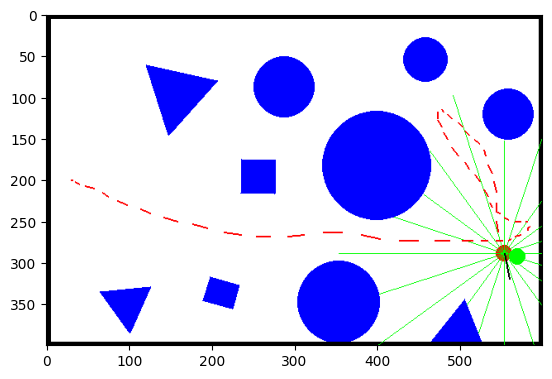

Episode 200	Average Score: -90.76	Success rate: 0.107

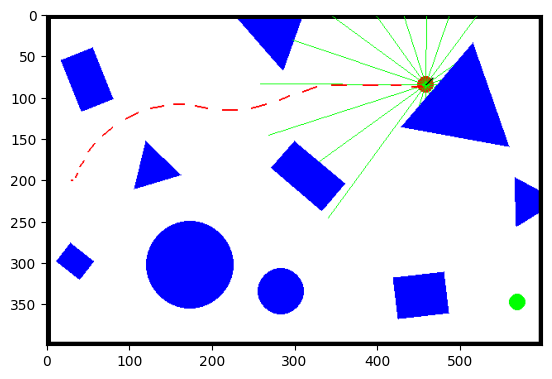

Episode 200	Average Score: -90.76, Eps: 0.367, Terminal vel: 10.959, angle:-0.32, dist2goal: 14.25, ang2goal: -0.85, step: 32, success rate: 0.10
Episode 212	Average Score: -86.16	Success rate: 0.13Goal reached! Vel:  32.461368560791016


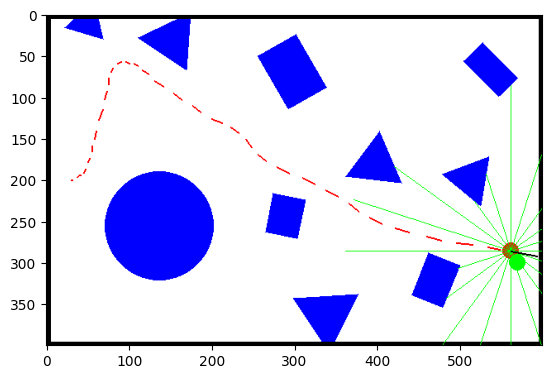

Episode 281	Average Score: -40.34	Success rate: 0.43Goal reached! Vel:  20.13168716430664


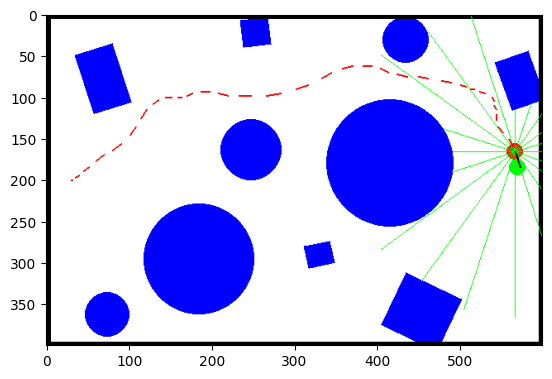

Episode 304	Average Score: -30.37	Success rate: 0.49Goal reached! Vel:  42.705753326416016


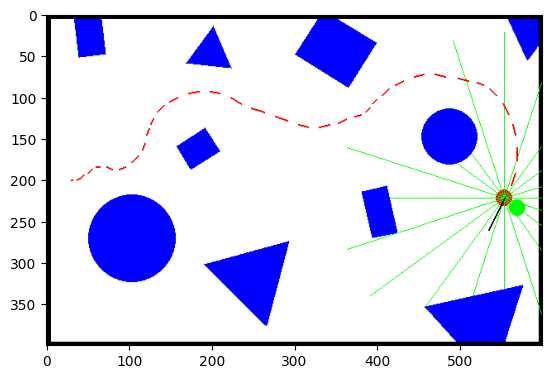

Episode 310	Average Score: -21.94	Success rate: 0.50Goal reached! Vel:  31.83098793029785


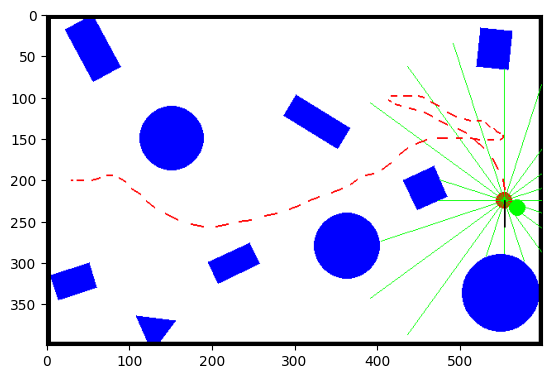

Episode 315	Average Score: -17.79	Success rate: 0.51Goal reached! Vel:  14.235250473022461


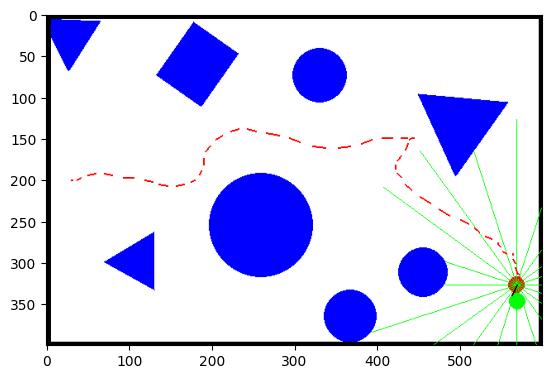

Episode 329	Average Score: 0.54	Success rate: 0.5543Goal reached! Vel:  25.464794158935547


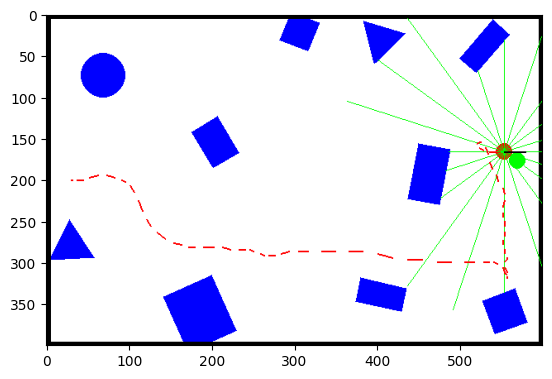

Episode 330	Average Score: 4.11	Success rate: 0.56Goal reached! Vel:  26.248504638671875


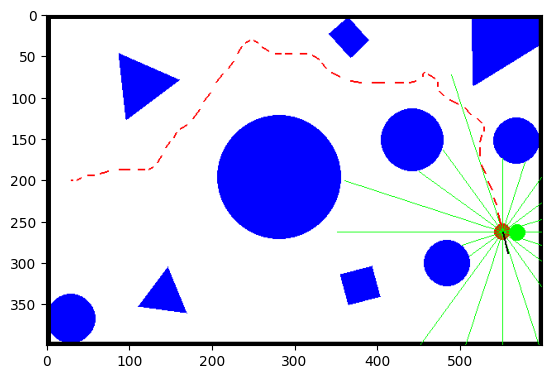

Episode 335	Average Score: 6.17	Success rate: 0.54Goal reached! Vel:  19.09859275817871


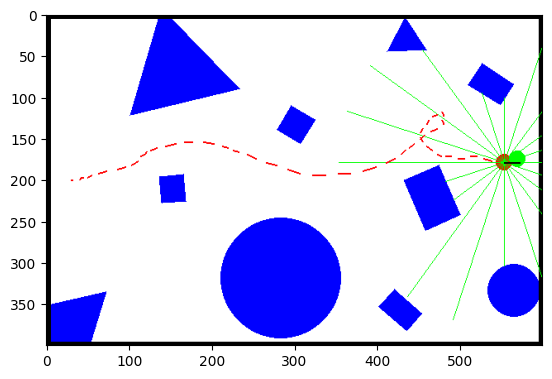

Episode 339	Average Score: 15.23	Success rate: 0.57Goal reached! Vel:  19.09859275817871


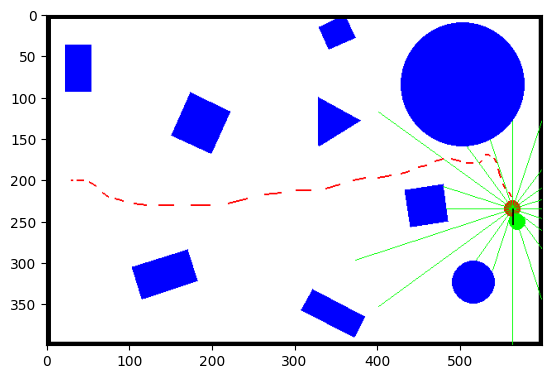

Episode 340	Average Score: 16.34	Success rate: 0.57Goal reached! Vel:  26.248504638671875


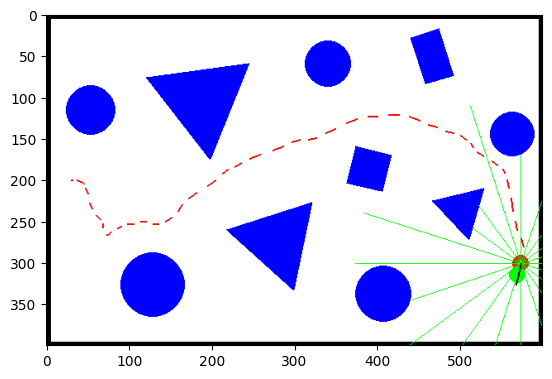

Episode 346	Average Score: 22.95	Success rate: 0.58Goal reached! Vel:  28.470502853393555


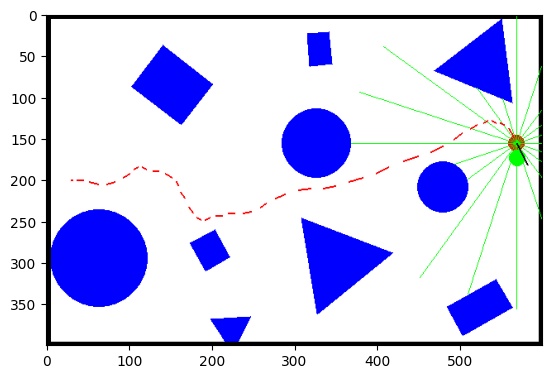

Episode 374	Average Score: 31.93	Success rate: 0.64Goal reached! Vel:  18.006328582763672


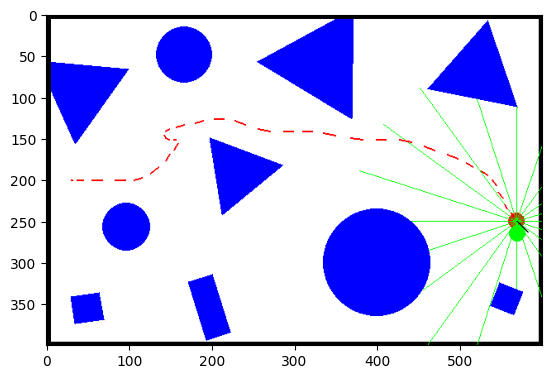

Episode 375	Average Score: 34.87	Success rate: 0.64Goal reached! Vel:  32.461368560791016


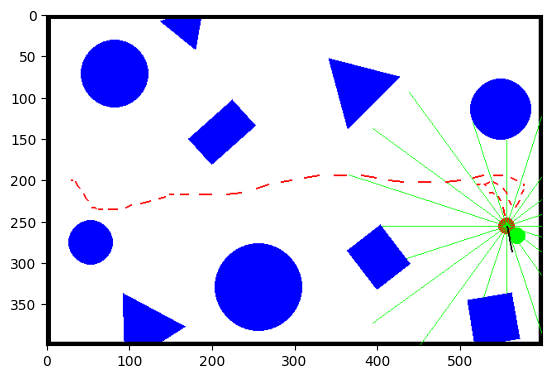

Episode 387	Average Score: 43.77	Success rate: 0.66Goal reached! Vel:  19.098596572875977


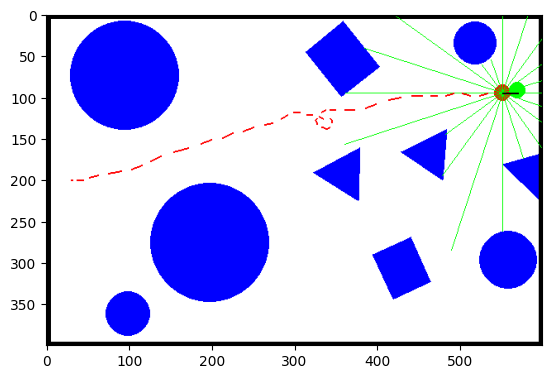

Episode 400	Average Score: 51.30	Success rate: 0.68

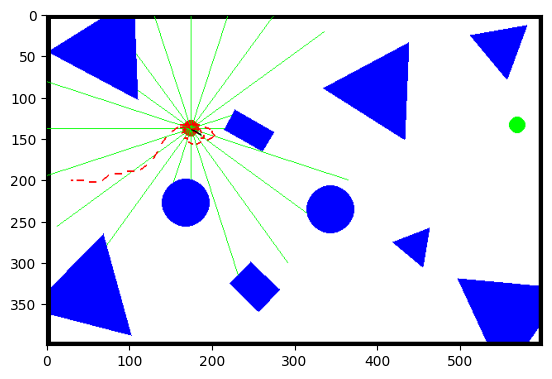

Episode 400	Average Score: 51.30, Eps: 0.135, Terminal vel: 14.235, angle:0.00, dist2goal: 19.74, ang2goal: 0.01, step: 99, success rate: 0.68
Goal reached! Vel:  14.235250473022461


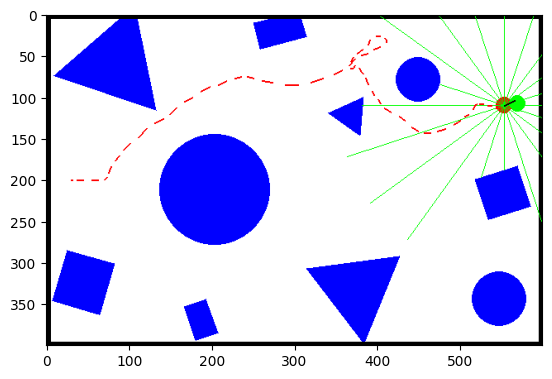

Episode 401	Average Score: 52.22	Success rate: 0.68Goal reached! Vel:  22.953651428222656


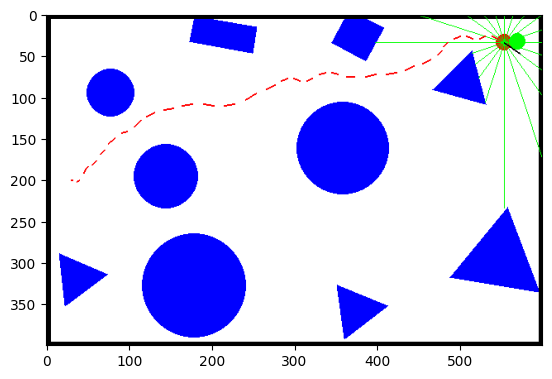

Episode 403	Average Score: 54.87	Success rate: 0.68Goal reached! Vel:  32.461368560791016


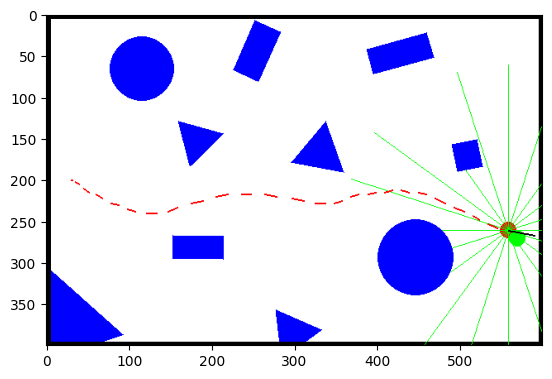

Episode 405	Average Score: 52.47	Success rate: 0.68Goal reached! Vel:  14.235254287719727


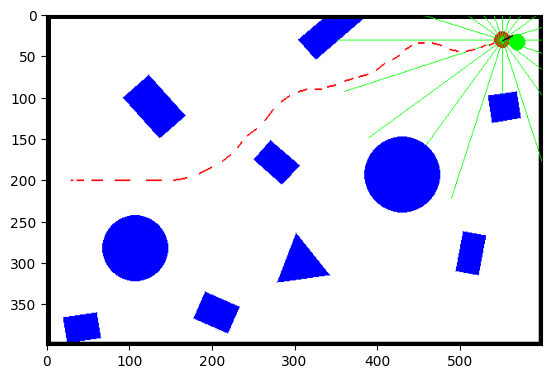

Episode 416	Average Score: 44.77	Success rate: 0.68Goal reached! Vel:  40.263370513916016


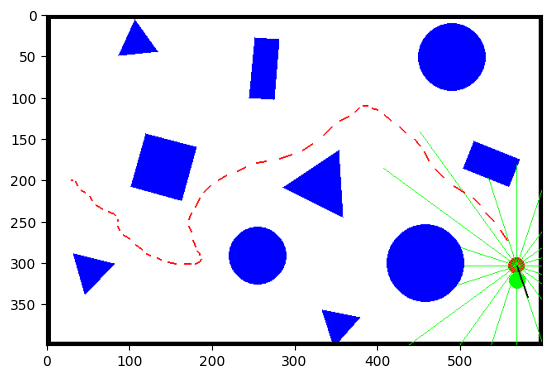

Episode 425	Average Score: 49.07	Success rate: 0.69Goal reached! Vel:  14.235250473022461


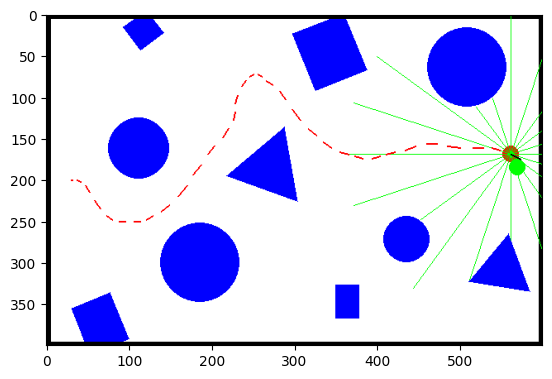

Episode 436	Average Score: 44.41	Success rate: 0.70Goal reached! Vel:  6.36619758605957


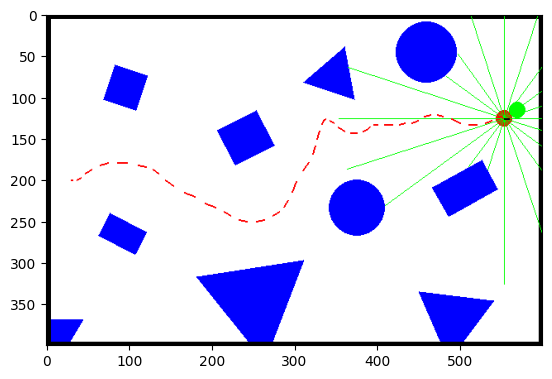

Episode 437	Average Score: 47.89	Success rate: 0.70Goal reached! Vel:  20.131685256958008


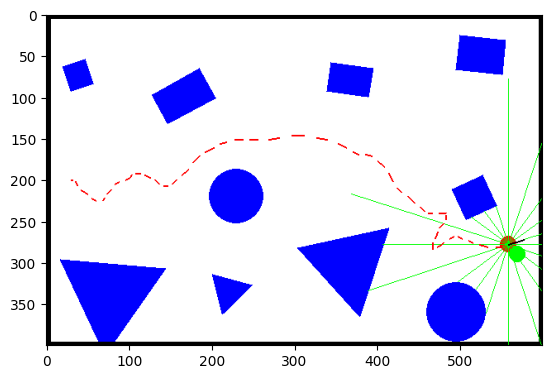

Episode 462	Average Score: 57.70	Success rate: 0.68Goal reached! Vel:  28.47049903869629


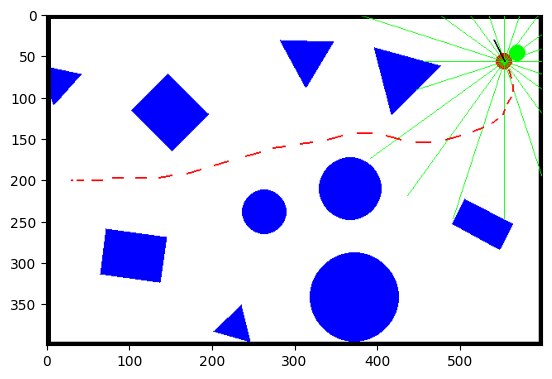

Episode 472	Average Score: 65.23	Success rate: 0.71Goal reached! Vel:  12.732398986816406


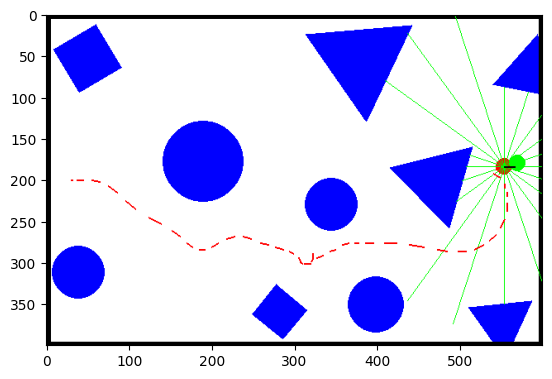

Episode 475	Average Score: 67.24	Success rate: 0.71Goal reached! Vel:  19.09859275817871


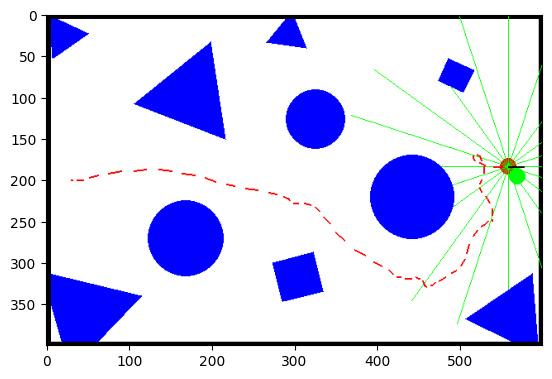

Episode 479	Average Score: 71.10	Success rate: 0.71Goal reached! Vel:  12.73239517211914


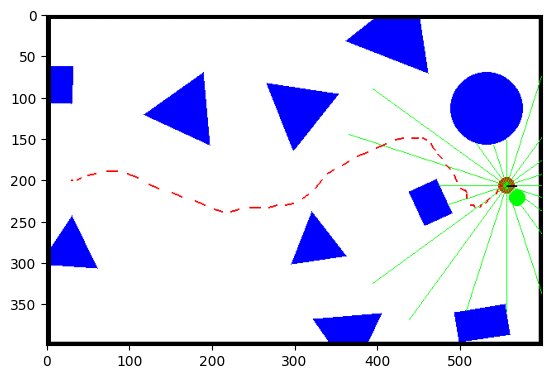

Episode 490	Average Score: 72.27	Success rate: 0.69Goal reached! Vel:  14.235252380371094


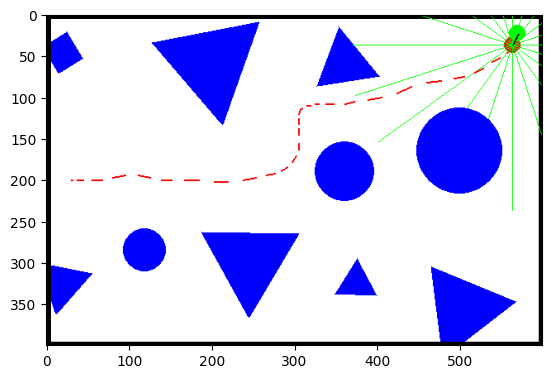

Episode 503	Average Score: 79.01	Success rate: 0.72Goal reached! Vel:  12.73239517211914


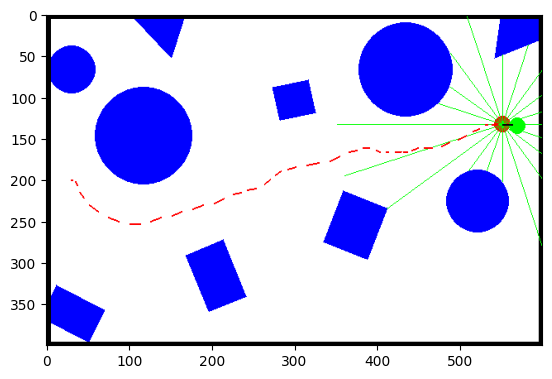

Episode 507	Average Score: 76.64	Success rate: 0.71Goal reached! Vel:  26.248504638671875


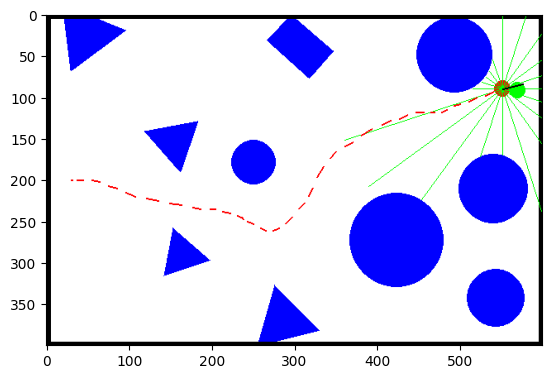

Episode 527	Average Score: 84.16	Success rate: 0.77Goal reached! Vel:  6.36619758605957


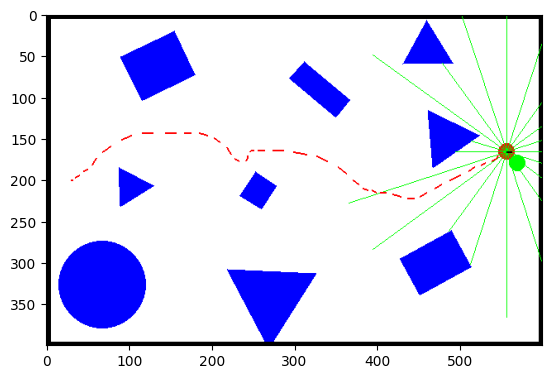

Episode 581	Average Score: 70.40	Success rate: 0.74Goal reached! Vel:  28.470502853393555


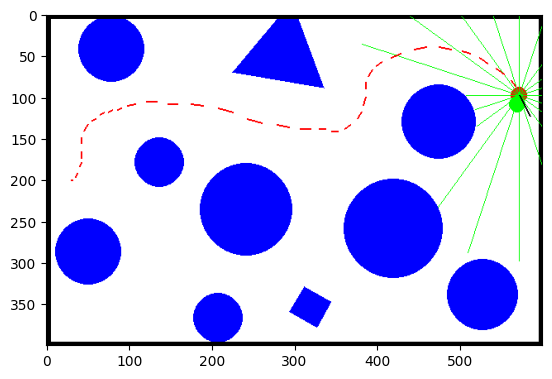

Episode 600	Average Score: 72.49	Success rate: 0.75

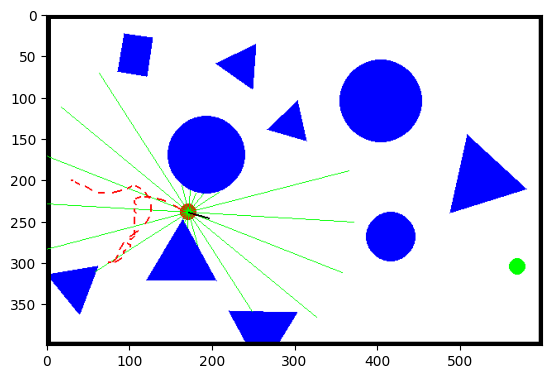

Episode 600	Average Score: 72.49, Eps: 0.049, Terminal vel: 26.315, angle:-0.06, dist2goal: 20.14, ang2goal: -0.11, step: 66, success rate: 0.75
Episode 635	Average Score: 100.94	Success rate: 0.78Goal reached! Vel:  27.009489059448242


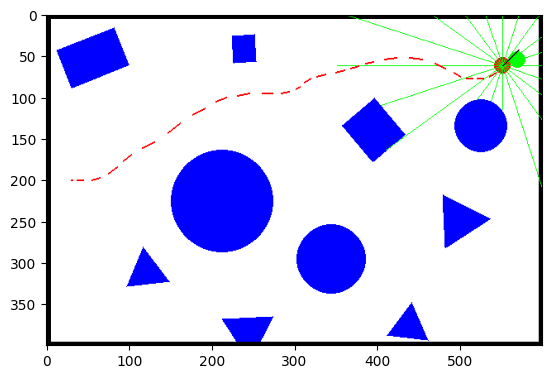

Episode 640	Average Score: 106.00	Success rate: 0.79Goal reached! Vel:  12.73239517211914


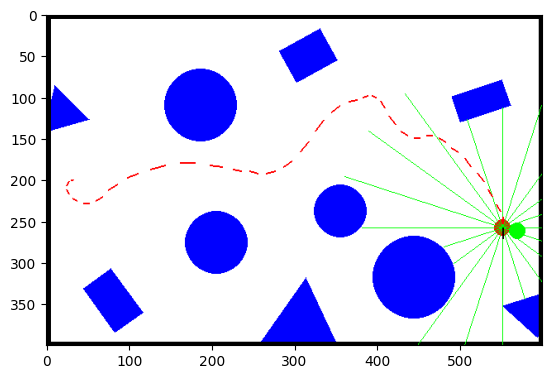

Episode 800	Average Score: 46.04	Success rate: 0.665

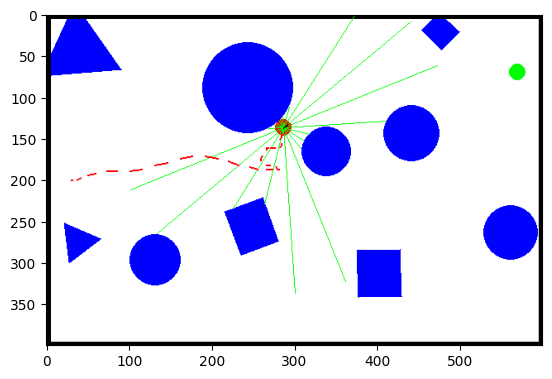

Episode 800	Average Score: 46.04, Eps: 0.018, Terminal vel: 5.627, angle:0.07, dist2goal: 14.50, ang2goal: 0.17, step: 74, success rate: 0.66
Episode 807	Average Score: 48.00	Success rate: 0.69Goal reached! Vel:  12.73239517211914


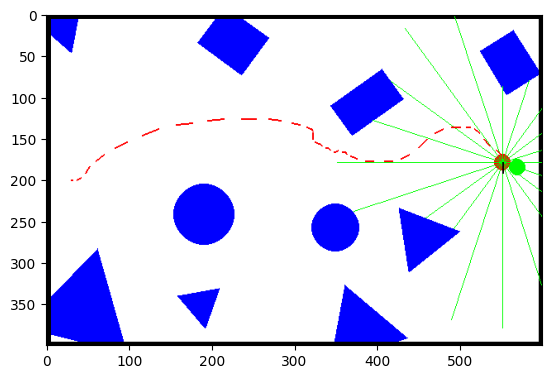

Episode 854	Average Score: 30.90	Success rate: 0.62Goal reached! Vel:  71.1762466430664


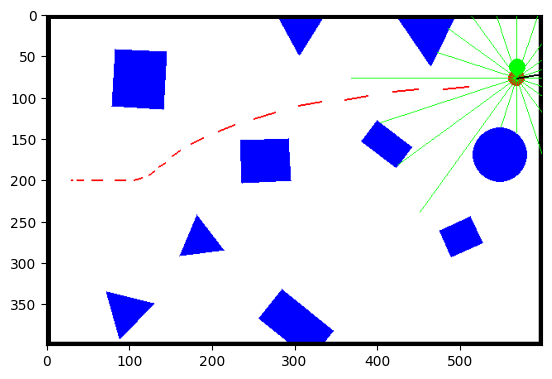

Episode 866	Average Score: 4.81	Success rate: 0.579Goal reached! Vel:  22.95365333557129


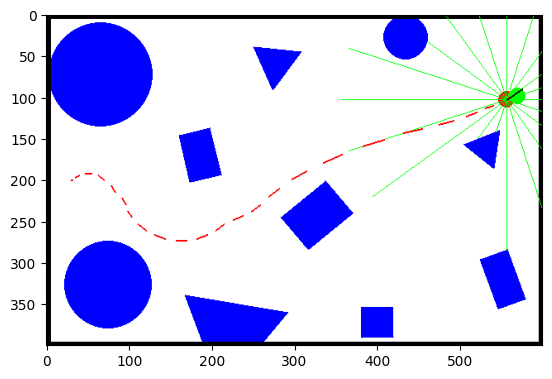

Episode 928	Average Score: 20.37	Success rate: 0.57Goal reached! Vel:  20.13168716430664


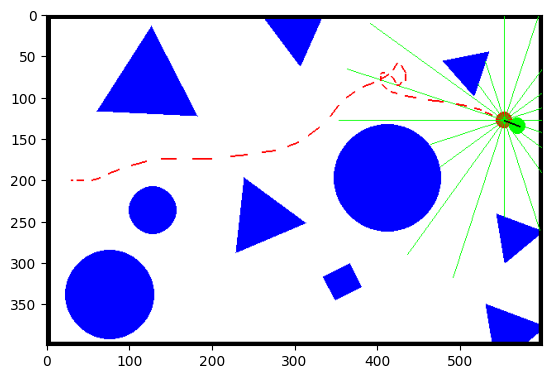

Episode 957	Average Score: 59.20	Success rate: 0.63Goal reached! Vel:  27.009490966796875


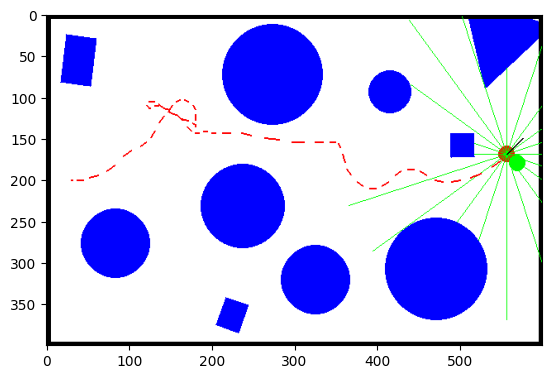

Episode 960	Average Score: 62.02	Success rate: 0.66Goal reached! Vel:  14.235254287719727


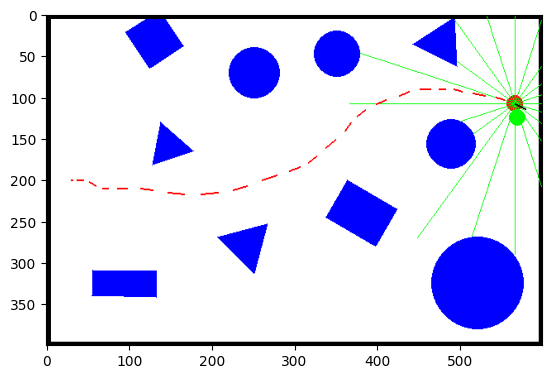

Episode 969	Average Score: 62.98	Success rate: 0.65Goal reached! Vel:  14.235254287719727


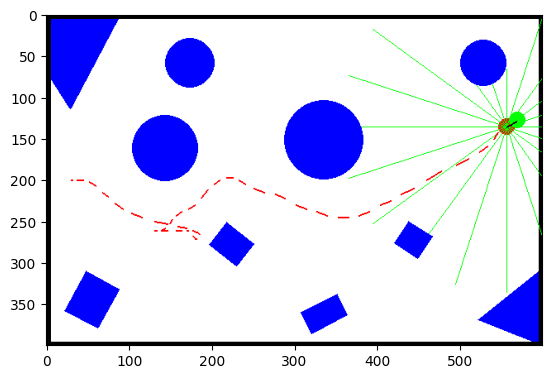

Episode 986	Average Score: 67.97	Success rate: 0.66

KeyboardInterrupt: 

In [4]:
# Make an environment
mean_steps = []
mean_scores = []
env = SimpleUAVEnv()
state_size = STATE_SPACE
action_size = ACTION_SPACE

# Initilize a DQN agent
agent = DQNAgent(state_size, action_size, learning_rate=0.001, type='conv')

train(agent, env, 2000, n_max_step=100, print_every=200)

DQNAgent.save(agent, 'agent.pkl')

In [ ]:
agent = DQNAgent(state_size, action_size, learning_rate=0.001, type='conv')
agent = DQNAgent.load(agent, 'agent.pkl')

In [ ]:
N_exp = 20
for i in range(N_exp):
    # Make an environment
    mean_steps = []
    mean_scores = []
    env = SimpleUAVEnv()
    state_size = STATE_SPACE
    action_size = ACTION_SPACE

    # Initilize a DQN agent
    agent = DQNAgent(state_size, action_size, learning_rate=0.001, type='pure')

    tmp_mean, tmp_step = train(agent, env, 1000, n_max_step=100, print_every=2000)
    mean_scores.append(tmp_mean)
    mean_steps.append(tmp_step)
    with open('pure_mean_scores_'+str(i)+'.pkl', 'wb') as f:
        pickle.dump(mean_scores, f)
    with open('pure_mean_steps_'+str(i)+'.pkl', 'wb') as f:
        pickle.dump(mean_steps, f)
    print('PureRes Experiment ', i, ' done!')

for i in range(N_exp):
    # Make an environment
    mean_steps = []
    mean_scores = []
    env = SimpleUAVEnv()
    state_size = STATE_SPACE
    action_size = ACTION_SPACE

    # Initilize a DQN agent
    agent = DQNAgent(state_size, action_size, learning_rate=0.001, type='conv')

    tmp_mean, tmp_step = train(agent, env, 1000, n_max_step=100, print_every=2000)
    mean_scores.append(tmp_mean)
    mean_steps.append(tmp_step)
    with open('conv_mean_scores_'+str(i)+'.pkl', 'wb') as f:
        pickle.dump(mean_scores, f)
    with open('conv_mean_steps_'+str(i)+'.pkl', 'wb') as f:
        pickle.dump(mean_steps, f)
    print('Conv Experiment ', i, ' done!')

PureRes Experiment  0  done!
PureRes Experiment  1  done!
PureRes Experiment  2  done!
PureRes Experiment  3  done!
PureRes Experiment  4  done!
PureRes Experiment  5  done!
PureRes Experiment  6  done!
PureRes Experiment  7  done!
PureRes Experiment  8  done!
PureRes Experiment  9  done!
PureRes Experiment  10  done!
PureRes Experiment  11  done!
PureRes Experiment  12  done!
PureRes Experiment  13  done!
PureRes Experiment  14  done!
PureRes Experiment  15  done!
PureRes Experiment  16  done!
PureRes Experiment  17  done!
PureRes Experiment  18  done!
PureRes Experiment  19  done!
Conv Experiment  0  done!
Conv Experiment  1  done!
Conv Experiment  2  done!
Conv Experiment  3  done!
Conv Experiment  4  done!
Conv Experiment  5  done!
Conv Experiment  6  done!
Conv Experiment  7  done!
Conv Experiment  8  done!
Conv Experiment  9  done!
Conv Experiment  10  done!
Conv Experiment  11  done!
Conv Experiment  12  done!
Conv Experiment  13  done!
Conv Experiment  14  done!
Conv Experiment

In [8]:
# List all files in the current directory
files = os.listdir()
# Filter out the pickle files and load the data
mean_scores1 = [pickle.load(open(file, 'rb')) for file in files if file.endswith('.pkl') and file.startswith('pure_mean_scores')]
mean_steps1 = [pickle.load(open(file, 'rb')) for file in files if file.endswith('.pkl') and file.startswith('pure_mean_steps')]
mean_scores2 = [pickle.load(open(file, 'rb')) for file in files if file.endswith('.pkl') and file.startswith('conv_mean_scores')]
mean_steps2 = [pickle.load(open(file, 'rb')) for file in files if file.endswith('.pkl') and file.startswith('conv_mean_steps')]
mean_scores1 = np.array(mean_scores1).squeeze(1)
mean_steps1 = np.array(mean_steps1).squeeze(1)
mean_scores2 = np.array(mean_scores2).squeeze(1)
mean_steps2 = np.array(mean_steps2).squeeze(1)


In [6]:
def moving_average(data, window_size):
    """Apply a simple moving average filter."""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def plot_mean_steps_scores(mean_scores1, mean_steps1, mean_scores2, mean_steps2, window_size=10):
    # Apply moving average if window_size > 1
    if window_size > 1:
        mean_scores1 = np.apply_along_axis(moving_average, 1, mean_scores1, window_size)
        mean_steps1 = np.apply_along_axis(moving_average, 1, mean_steps1, window_size)
        mean_scores2 = np.apply_along_axis(moving_average, 1, mean_scores2, window_size)
        mean_steps2 = np.apply_along_axis(moving_average, 1, mean_steps2, window_size)

    # Calculate means and standard deviations
    mean_scores1_mean = np.mean(mean_scores1, axis=0)
    mean_scores1_std = np.std(mean_scores1, axis=0)
    mean_steps1_mean = np.mean(mean_steps1, axis=0)
    mean_steps1_std = np.std(mean_steps1, axis=0)

    mean_scores2_mean = np.mean(mean_scores2, axis=0)
    mean_scores2_std = np.std(mean_scores2, axis=0)
    mean_steps2_mean = np.mean(mean_steps2, axis=0)
    mean_steps2_std = np.std(mean_steps2, axis=0)

    # Create subplots
    fig, axs = plt.subplots(2, 1, figsize=(18, 12), sharex=True)

    # Plot for mean scores
    axs[0].plot(mean_scores1_mean, label='ResNet-MLP', color='blue')
    axs[0].fill_between(range(len(mean_scores1_mean)), mean_scores1_mean - mean_scores1_std, mean_scores1_mean + mean_scores1_std, color='blue', alpha=0.3)
    axs[0].plot(mean_scores2_mean, label='ResNet-Conv', color='red')
    axs[0].fill_between(range(len(mean_scores2_mean)), mean_scores2_mean - mean_scores2_std, mean_scores2_mean + mean_scores2_std, color='red', alpha=0.3)
    axs[0].set_title('Mean Scores', fontsize=30)
    axs[0].set_xlabel('Iteration', fontsize=20)
    axs[0].set_ylabel('Scores', fontsize=20)
    axs[0].set_xlim([0, len(mean_scores1_mean)])
    #axs[0].legend()

    # Plot for mean steps
    axs[1].plot(mean_steps1_mean, label='ResNet-MLP', color='blue')
    axs[1].fill_between(range(len(mean_steps1_mean)), mean_steps1_mean - mean_steps1_std, mean_steps1_mean + mean_steps1_std, color='blue', alpha=0.3)
    axs[1].plot(mean_steps2_mean, label='ResNet-Conv', color='red')
    axs[1].fill_between(range(len(mean_steps2_mean)), mean_steps2_mean - mean_steps2_std, mean_steps2_mean + mean_steps2_std, color='red', alpha=0.3)
    axs[1].set_title('Mean Steps per Episode', fontsize=30)
    axs[1].set_xlabel('Iteration', fontsize=20)
    axs[1].set_ylabel('Steps', fontsize=20)
    axs[0].set_xlim([0, len(mean_scores1_mean)])
    #axs[1].legend()

    # Enhance layout for presentation
    plt.tight_layout()
    plt.legend(fontsize=20, loc='upper left')
    plt.savefig('test.png', dpi=600)
    plt.show()

# Use the function like this:
# plot_mean_steps_scores(mean_scores1, mean_steps1, mean_scores2, mean_steps2, window_size=5)


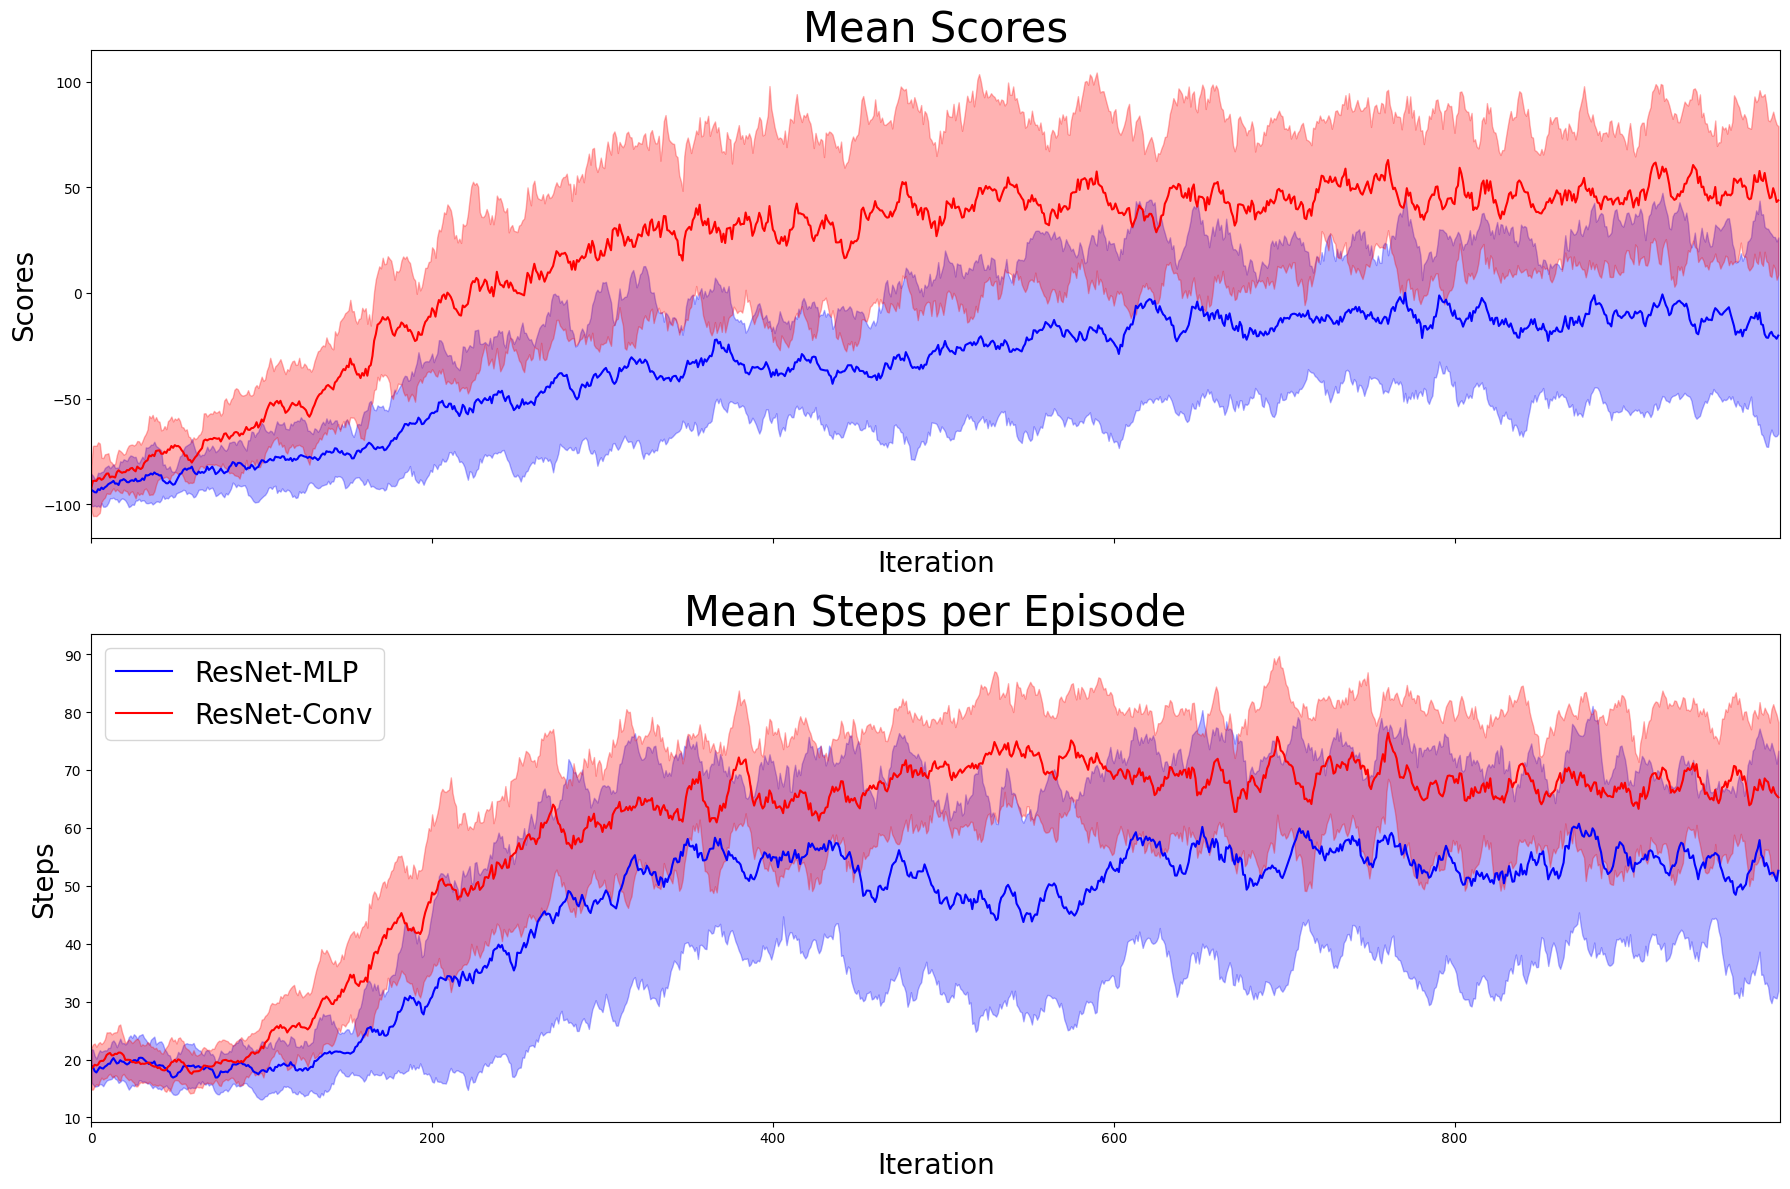

In [9]:
plot_mean_steps_scores(mean_scores1, mean_steps1, mean_scores2, mean_steps2)


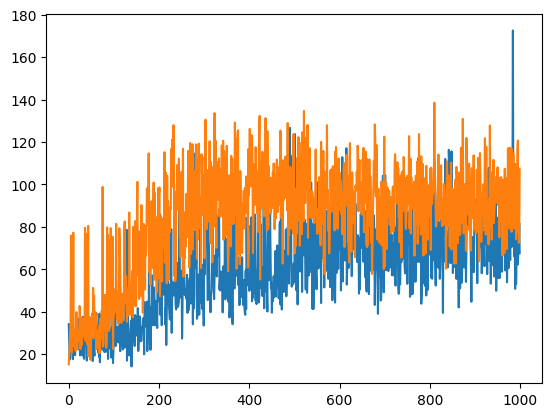

In [ ]:
plt.plot(np.std(mean_scores1, axis=0))
plt.plot(np.std(mean_scores2, axis=0))

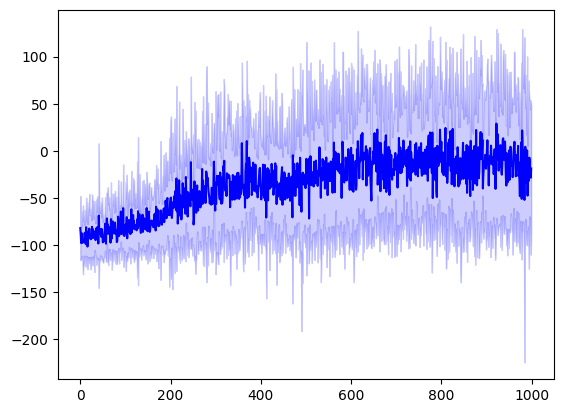

In [ ]:
plot_with_uncertainty(mean_scores1, 'blue')